### In the first section of the assignment, you will design a Convolutional Neural Network (CNN) to classify the Cifar-10 dataset. In the second section, you will design a Bean Disease Classifier to categorize healthy and diseased beans.

# 1.Create a CNN to classify Cifar-10

In the previous assignment you built a CNN that classified 10 different apparel from the Fashion MNIST dataset. For this section, you will use a similar network but there are some key differences you'll need to take into account. Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html


---


**Question 1**: Can you think of two differences in the model required to classify the Cifar-10 Dataset and the Fashion MNIST Dataset?

**Answer:** The model must account for color in Cifar-10 wheras Fashion MNIST is purely grayscale. Additionally, we can see that there is no class overlap/less similarity in the theme for Cifar-10 (MNIST is all centered around apparel). This, coupled with the fact that there is less standardization in image orientation, means that we will have to emphasize our convolutional layers in our Cifar-10 model.



---





### Load Dataset

We set up the problem by first loading the dataset and splitting into train and test sets.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Normalize Images

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

### Visualize Sample Training Examples

Explore the images from the Cifar-10 dataset. Could it help you determine the input shape and the layers of the machine learning model?

First, print the shape of the training images, training labels, test images and test labels.

In [ ]:
# Print shapes of train and test sets
print("Training:", "Images Shape:", train_images.shape, "Labels Shape: ", train_labels.shape)
print("Testing:", "Images Shape: ",test_images.shape, "Labels Shape: ", test_labels.shape)

Training: Images Shape: (50000, 32, 32, 3) Labels Shape:  (50000, 1)
Testing: Images Shape:  (10000, 32, 32, 3) Labels Shape:  (10000, 1)


---


**Question 2:** Plot the first 3 training images along with the training labels.




---



In [ ]:
#Helper Fxn to Plot an Image and its Label
def show_training_image(img_index):
  plt.figure()
  plt.imshow(train_images[img_index])
  plt.title("Label: " + str(train_labels[img_index][0]))
  plt.grid(False)
  plt.show()

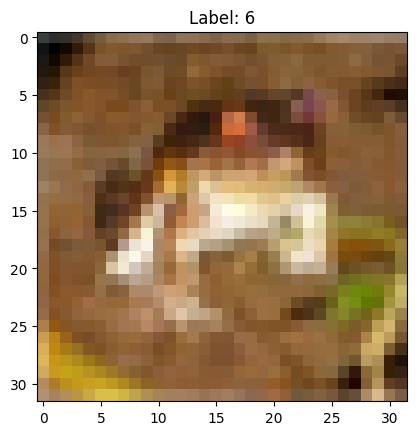

In [ ]:
# Plot 1st training example
show_training_image(0)

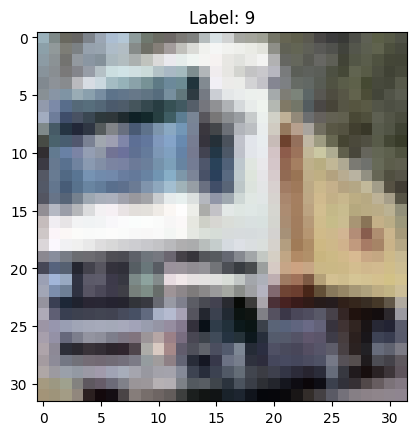

In [ ]:
# Plot 2nd training example
show_training_image(1)

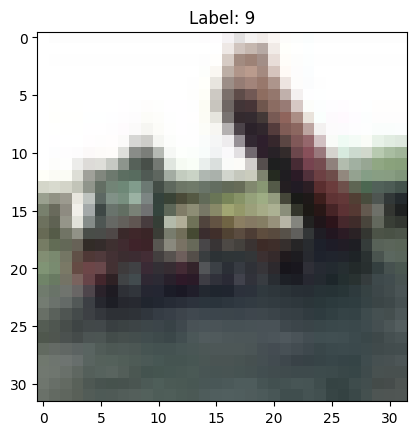

In [ ]:
# Plot 3rd training example
show_training_image(2)

### Define Model

It's now time to define your CNN. Experient with different no. of layers enough to get above 85% training accuracy and above 70% validation accuracy!

***Hint:*** your model may want to learn some high level features and then classify them i.e., first define Conv2D and MaxPooling2D layers followed by Dense layers.

In [ ]:
# Define your model layers!

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 489,802 (1.87 MB)

 Trainable params: 489,802 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

Define an appropriate loss function and optimizer. Then compile your model!

In [ ]:
# Define the loss function and optimizer and compile the model
OPT = 'adam'
LOSS = 'sparse_categorical_crossentropy'
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['acc'])

### Train Model

Now train your model for a fixed number of epochs. You can experiment with this hyperparameter (NUM_EPOCHS) to get the desired accuracy (above 85% training accuracy and above 70% validation accuracy)

In [ ]:
NUM_EPOCHS = 8

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.3461 - loss: 1.7459 - val_acc: 0.6040 - val_loss: 1.1340
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6049 - loss: 1.1168 - val_acc: 0.6366 - val_loss: 1.0226
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.6775 - loss: 0.9198 - val_acc: 0.6698 - val_loss: 0.9327
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7254 - loss: 0.7824 - val_acc: 0.6832 - val_loss: 0.9088
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7570 - loss: 0.6949 - val_acc: 0.7144 - val_loss: 0.8315
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.7828 - loss: 0.6216 - val_acc: 0.7164 - val_loss: 0.8596
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.8007 - loss: 0.5533 - val_acc: 0.7183 - val_loss: 0.8493
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8331 - loss: 0.4757 - val_acc: 0.7216 - val_loss: 0.8514


### Plot Accuracy vs Epochs

Finally, plot a single graph of both training and test (validation) accuracies vs Epochs. Be sure to include a legend and x & y axis labels.


***Hint1:*** Use information stored in 'history'.

***Hint2:*** Use plt.plot()

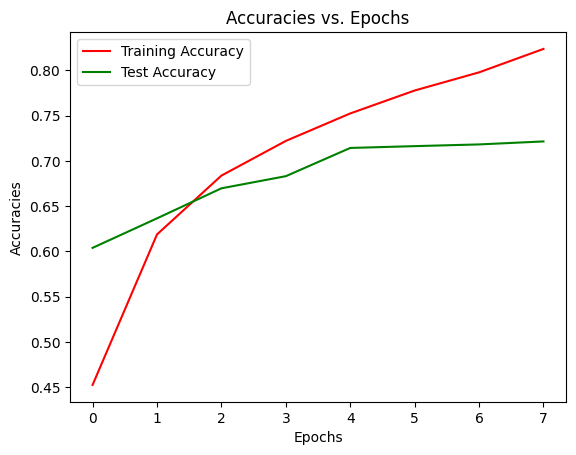

In [ ]:
# TODO: Plot train and test (validation) accuracies vs Epochs on a single plot
xaxis = range(NUM_EPOCHS)
plt.plot(xaxis, history.history['acc'], 'r',label="Training Accuracy")
plt.plot(xaxis, history.history['val_acc'], 'g', label="Test Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(loc='upper left')
plt.title('Accuracies vs. Epochs')
plt.show()

# 2. Bean Disease Classifier
For this section of the assignment, you'll take what you've learned so far and build a classifier for bean diseases. You'll be provided with training and validation data of images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load Dataset

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In the case, that the below cells do not work and the tmp/ directory refuses to show up. You can manually download the dataset from this [link](https://drive.google.com/drive/folders/1D5yto1n48ksf52iHLqwtiTy5_CWGUS1I?usp=share_link).

After that you can use the mount google drive option that we have commented below to use it directly. **You will need to modify the directory names for this to work.**

In [ ]:
# download train set
!gdown --id 1vunpRL_B5fxrLbro6t4GHDdqKKyZjPhm -O /tmp/train.zip

# download validation set
!gdown --id 1rGg-OB2V_V78-d02yjwh1xfwLcg9mMoI -O /tmp/validation.zip

# download test set
!gdown --id 1UOmf0T5w56DdXRWgmd4Gxvmz_21Xukpc -O /tmp/test.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vunpRL_B5fxrLbro6t4GHDdqKKyZjPhm
From (redirected): https://drive.google.com/uc?id=1vunpRL_B5fxrLbro6t4GHDdqKKyZjPhm&confirm=t&uuid=90cf4398-e54a-4217-9e8d-100a357175e2
To: /tmp/train.zip
100% 144M/144M [00:03<00:00, 41.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rGg-OB2V_V78-d02yjwh1xfwLcg9mMoI
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 78.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in versio

The .zip files are extracted and loaded into three directories - train, validation, and test. Each of them further have three directories each representing the 3 classes.

You can find them in the **tmp/** directory in the files tab on the left.

In [ ]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Display example images

Visualize some training examples from each of the three classes. Use the below defined function `show_img()` to plot an example image of the *angular_leaf_spot*, *bean_rust*, and *healthy* classes from the train directory.

The required data can be found in the tmp/ folder under Files on the left tab.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_img(path, file_name):
    image = mpimg.imread(path + file_name)
    plt.imshow(image)
    plt.show()

Plot an example from the ***angular_leaf_spot*** class.


***Hint:*** You can find the path of the required directory by right-clicking on the three vertical dots and choosing 'Copy path' (hover the cursor over the directory)

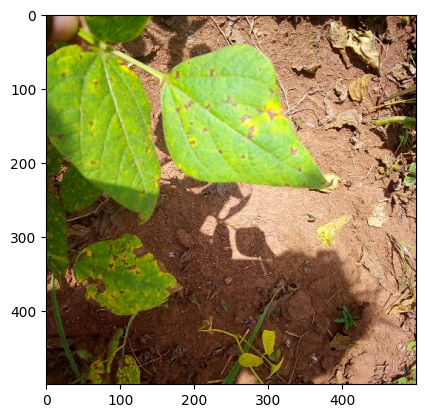

In [ ]:
# Define path and filename and display a training example
train_angular_leaf_spot_path = '/tmp/train/angular_leaf_spot/'
train_angular_leaf_spot_filename = 'angular_leaf_spot_train.0.jpg'

show_img(train_angular_leaf_spot_path,train_angular_leaf_spot_filename)

Plot an example from the ***bean_rust*** class.

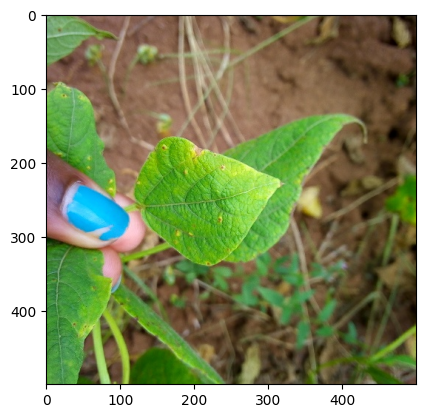

In [ ]:
# Define path and filename and display a training example
train_bean_rust_path = '/tmp/train/bean_rust/'
train_bean_rust_filename = 'bean_rust_train.0.jpg'

show_img(train_bean_rust_path,train_bean_rust_filename)

Plot an example from the ***healthy*** class.

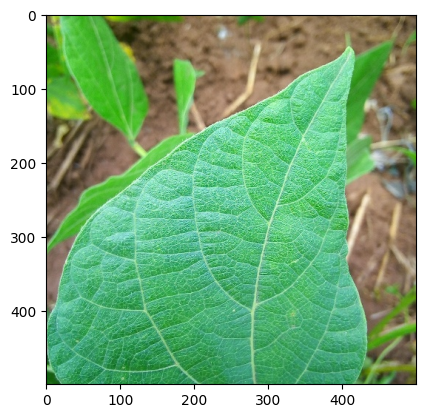

In [ ]:
# Define path and filename and display a training example
train_healthy_path = '/tmp/train/healthy/'
train_healthy_filename = 'healthy_train.0.jpg'

show_img(train_healthy_path,train_healthy_filename)


### Define Generator to include Image Augmentation

Define a generator (```ImageDataGenerator```) to process the train and validation data we have loaded in Colab so that our model can use it for training.

Include the following Image Augmentation parametes for the **train data generator**.

> rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'.

Include the following Image Augmentation parametes for the **validation data generator**.

> rescale=1./255



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# < YOUR CODE HERE >
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# < YOUR CODE HERE >
validation_datagen = ImageDataGenerator(
    rescale=1./255
)


TRAIN_DIRECTORY_LOCATION = '/tmp/train/'
VAL_DIRECTORY_LOCATION = '/tmp/validation/'
TARGET_SIZE = target_size=(224, 224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


### Define Model

Now its your turn to define a model to learn this data. Experient with different no. of layers enough to get above 75% training accuracy and above 70% validation accuracy! Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them.

**Note:** Be careful of the input shape of the first Conv2D layer.



In [ ]:
# Define CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

Print your model summary!

In [ ]:
# Print a summary of your model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,011 (2.48 MB)

 Trainable params: 651,011 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

---


**Question 3**: Why are the number of parameters learned in the MaxPooling layers =  0?

**Answer:** Pooling layers don't learn: they don't have any weights or biases. They will execute the same for every iteration of the model by taking a region of the image and outputting the max value.

---


Pick an appropriate loss function and optimizer. Then compile your model! Don't forget to define your metric!

In [ ]:
# Define Loss Function and Optimizer. Compile Model
OPT = 'adam'
LOSS = 'categorical_crossentropy'
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['acc'])

### Train Model

Now train your model for a fixed number of epochs. You can experiment with this hyperparameter (NUM_EPOCHS) to get the desired accuracy (above 75% training accuracy and above 70% validation accuracy)


In [ ]:
NUM_EPOCHS = 30


history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.3152 - loss: 1.1048 - val_acc: 0.5489 - val_loss: 1.0454
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 552ms/step - acc: 0.4902 - loss: 1.0389 - val_acc: 0.3534 - val_loss: 1.0920
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 462ms/step - acc: 0.4233 - loss: 1.0564 - val_acc: 0.3835 - val_loss: 1.0371
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 409ms/step - acc: 0.5088 - loss: 0.9965 - val_acc: 0.6466 - val_loss: 0.8438
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 411ms/step - acc: 0.6127 - loss: 0.8913 - val_acc: 0.5188 - val_loss: 0.8893
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - acc: 0.6030 - loss: 0.8983 - val_acc: 0.5865 - val_loss: 0.8638
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - acc: 0.6214 - loss: 0.8541 - val_acc: 0.6692 - val_loss: 0.7612
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 501ms/step - acc: 0.6028 - loss: 0.8708 - val_acc: 0.6692 - val_loss: 0.7639
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - acc: 0.6550 - loss: 0.791

### Plot Accuracy vs Epochs

Finally, similar to section 1, plot a graph of both training and test (validation) accuracies vs Epochs. Include a legend and x & y axis labels.


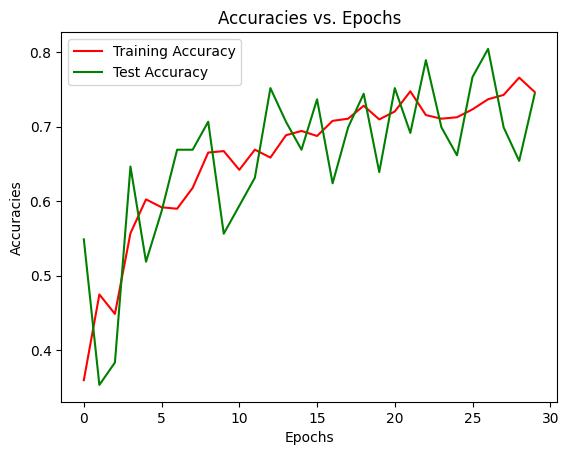

In [ ]:
# Plot train and test accuracies vs Epochs
xaxis = range(NUM_EPOCHS)
plt.plot(xaxis, history.history['acc'], 'r',label="Training Accuracy")
plt.plot(xaxis, history.history['val_acc'], 'g', label="Test Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(loc='upper left')
plt.title('Accuracies vs. Epochs')
plt.show()